 ### Calculate Option Price with Changing Interest Rate

### Step1 :  Create List of Interest Rate by Hull-White Process
#### 計算流程:
#### 1.	輸入Sigma of Interest rate, a, timestep, length (in years), forward rate, number of paths
#### 2.	用QL套件計算Hull-White Process
#### 3.	產出一段時間內的利率集及走勢圖
### Step2 : Calculate Option Price by Monte Carlo with Changing Interest Rate
#### 計算流程:
#### 1.	輸入strike price, risk-free interest rate, delta T, Sigma of stock, stock price
#### 2.	以蒙地卡羅計算未來資產價格
#### 3.	產出call和put的價格及走勢圖


Enter Sigma of Interest rate: 0.1
Enter a : 0.1
Enter timestep : 1000
Enter length (in years) : 0.5
Enter forward rate : 0.1
Enter number of paths : 1000


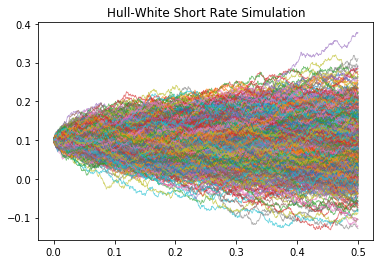

In [1]:
# Create List of Interest Rate by Hull-White Process
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
"""
sigma = 0.1
a = 0.1
timestep = 7
length = 1 # in years
forward_rate = 0.05
"""
# Input info of interest rate
sigma = float(input("Enter Sigma of Interest rate: "))
a = float(input("Enter a : "))
timestep = int(input("Enter timestep : "))
length = float(input("Enter length (in years) : ")) # in years
forward_rate = float(input("Enter forward rate : "))
num_paths = int(input("Enter number of paths : "))

day_count = ql.Thirty360()
todays_date = ql.Date(13, 5, 2020)
ql.Settings.instance().evaluationDate = todays_date

# Hull White
spot_curve = ql.FlatForward(todays_date, ql.QuoteHandle(ql.SimpleQuote(forward_rate)), day_count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)
hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hw_process, length, timestep, rng, False)



def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr


time, paths = generate_paths(num_paths, timestep)
short_l = paths
#print(short_l[0])
for i in range(num_paths):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
plt.title("Hull-White Short Rate Simulation")
plt.show()

Enter strike price : 120
Enter risk-free interest rate : 0.03
Enter delta T : 0.01
Enter Sigma of stock : 0.15
Enter stock price : 110


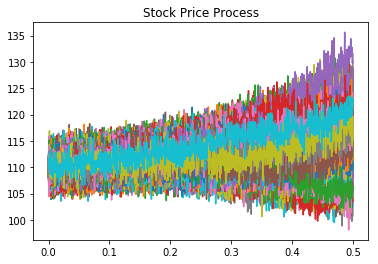

Option Price of Call :  0.28790380009880984
Option Price of Put :  5.082331119404916


In [2]:
# Calculate Option Price by Monte Carlo with Changing Interest Rate
import matplotlib.pyplot as plt
import numpy as np
# k = 120
# T = length
# N = num_paths # Path
# dt = 1/12
# sigma = 0.01
# S0 = 100

k =  float(input("Enter strike price : "))
r =  float(input("Enter risk-free interest rate : "))
T = length
N = num_paths # Path
dt = float(input("Enter delta T : "))
sigma = float(input("Enter Sigma of stock : "))
S0 = float(input("Enter stock price : "))
np.random.seed(1)

def genBrownPath (T, short_l, sigma, S0, dt):
    
    n = len(short_l)
    t = np.linspace(0, T, n)
    W = [0]
    for i in range(n-1):
        W.append(np.random.standard_normal()*np.sqrt(dt))

    #W = np.cumsum(W)*np.sqrt(dt) # == standard brownian motion
    #print(W)
    X = []
    S = []
    for i in range(len(W)):
        X.append((short_l[i]-0.5*sigma**2)*t[i] + sigma*W[i])
            
    for i in range(len(X)):
        S.append(S0*np.exp(X[i])) # == geometric brownian motion
    #print(S[0])
    #print(j,S)
    plt.plot(t, S)
    #print(S[-1])
    return S

paths2 = []
payoff_c = []
payoff_p = []
for i in range(0,N):
    paths2.append(genBrownPath(T, short_l[i], sigma, S0, dt))
    payoff_c.append(max(paths2[i][-1]-k,0))
    payoff_p.append(max(k - paths2[i][-1],0))
plt.title("Stock Price Process")
plt.show()

print("Option Price of Call : ",np.mean(payoff_c)*np.exp(-r*T))
print("Option Price of Put : ",np.mean(payoff_p)*np.exp(-r*T))